In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd

In [3]:
df = pd.read_csv("data/bs.csv")
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [4]:
df2= pd.read_csv("data/bsNET.csv")
df2.head()

,Source,Target,Weight,typeTrans,fraud
0,'C1093826151','M348934600',4.55,'es_transportation',0
1,'C352968107','M348934600',39.68,'es_transportation',0
2,'C2054744914','M1823072687',26.89,'es_transportation',0
3,'C1760612790','M348934600',17.25,'es_transportation',0
4,'C757503768','M348934600',35.72,'es_transportation',0


In [6]:
df2 = df2.rename(columns={"Source": "customer", "Target": "merchant", "Weight": "amount", "typeTrans": "category"})
df2.isin(df).all().all()

True

In [17]:
cols = list(df.columns)
fields = list(set(cols) - set(["step", "customer", "merchant", "zipcodeOri", "zipMerchant"]))
for field in fields:
    print(df.groupby("fraud")[field].value_counts())

fraud  fraud
0      0        587443
1      1          7200
Name: fraud, dtype: int64
fraud  age
0      '2'    184966
       '3'    145376
       '4'    107615
       '5'     61956
       '1'     57442
       '6'     26513
       '0'      2404
       'U'      1171
1      '2'      2344
       '3'      1755
       '4'      1410
       '1'       689
       '5'       686
       '6'       261
       '0'        48
       'U'         7
Name: age, dtype: int64
fraud  category               
0      'es_transportation'        505119
       'es_food'                   26254
       'es_health'                 14437
       'es_wellnessandbeauty'      14368
       'es_fashion'                 6338
       'es_barsandrestaurants'      6253
       'es_hyper'                   5818
       'es_tech'                    2212
       'es_sportsandtoys'           2020
       'es_home'                    1684
       'es_hotelservices'           1196
       'es_contents'                 885
       'es_otherservi

In [22]:
df.step.min()
df.step.max()

0

179

count    594643.000000
mean         37.890135
std         111.402831
min           0.000000
25%          13.740000
50%          26.900000
75%          42.540000
max        8329.960000
Name: amount, dtype: float64

array([[<AxesSubplot:title={'center':'amount'}>]], dtype=object)

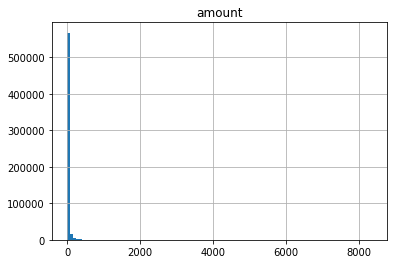

In [32]:
import matplotlib
df.amount.describe()
df.hist(column= 'amount', bins=100)

<AxesSubplot:>

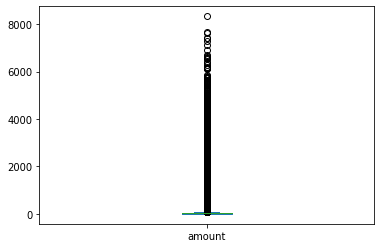

In [36]:
df.amount.plot.box()